In [1]:

import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


In [2]:
df_final_demo = r'https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_demo.txt'
df_final_web_data_pt1 = r'https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_web_data_pt_1.txt'
df_final_web_data_pt2 = r'https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_web_data_pt_2.txt'
df_final_experiment_client = r'https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_experiment_clients.txt'



In [4]:
# Intenta leer el archivo
try:
    df_final_demo = pd.read_csv(df_final_demo, sep=',')  
    df_final_web_data_pt1= pd.read_csv(df_final_web_data_pt1, sep=',')
    df_final_web_data_pt2= pd.read_csv(df_final_web_data_pt2, sep=',')
    df_final_experiment_client= pd.read_csv(df_final_experiment_client, sep=',')
except Exception as e:
    print(f"Error al cargar el archivo: {e}")

Error al cargar el archivo: argument of type 'method' is not iterable


In [5]:
df_final_demo.columns = df_final_demo.columns.str.lower()
df_final_web_data_pt1.columns = df_final_web_data_pt1.columns.str.lower()
df_final_web_data_pt2.columns = df_final_web_data_pt2.columns.str.lower()
df_final_experiment_client.columns = df_final_experiment_client.columns.str.lower()


In [6]:
final_demo = df_final_demo
final_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [7]:
final_demo = pd.merge(final_demo, df_final_experiment_client, on='client_id')
final_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,NaN
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,NaN
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,NaN
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,NaN


In [8]:
final_demo = final_demo.dropna()
final_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
50495,1780858,21.0,262.0,68.5,M,3.0,372100.59,6.0,9.0,Test
50496,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,Control
50497,5826160,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0,Test
50498,8739285,19.0,229.0,69.5,F,2.0,44994.24,1.0,4.0,Test


In [9]:
df_final_web_data_pt1

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [10]:
df_final_web_data_pt2

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [12]:
final_web = pd.concat([df_final_web_data_pt1, df_final_web_data_pt2], ignore_index=True)
final_web

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [13]:
final_web.isna()

,client_id,visitor_id,visit_id,process_step,date_time
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
755400,False,False,False,False,False
755401,False,False,False,False,False
755402,False,False,False,False,False
755403,False,False,False,False,False


In [14]:
print(final_web.isnull().sum())


client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64


In [15]:
tabla_analisis = pd.merge(final_demo, final_web, on='client_id')

In [16]:
tabla_analisis

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13
1,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50
2,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45
3,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08
4,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321190,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,Test,317123960_46820919455,769876461_30381166055_830233,step_2,2017-03-30 23:59:15
321191,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,Test,317123960_46820919455,769876461_30381166055_830233,step_1,2017-03-30 23:58:51
321192,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,Test,317123960_46820919455,769876461_30381166055_830233,start,2017-03-30 23:58:40
321193,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,Test,317123960_46820919455,769876461_30381166055_830233,start,2017-03-30 23:55:11


In [17]:
tabla_analisis.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13
1,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50
2,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45
3,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08
4,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24


In [18]:
tabla_analisis["process_step"].unique()

array(['confirm', 'step_3', 'step_2', 'step_1', 'start'], dtype=object)

In [19]:
tabla_test = tabla_analisis.set_index(['client_id', 'process_step'])
tabla_test.tail(10)

clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  \
client_id process_step                                                     
8739285   step_3                  19.0             229.0      69.5     F   
          step_2                  19.0             229.0      69.5     F   
          step_1                  19.0             229.0      69.5     F   
          start                   19.0             229.0      69.5     F   
7468138   step_3                  18.0             222.0      61.0     F   
          step_2                  18.0             222.0      61.0     F   
          step_1                  18.0             222.0      61.0     F   
          start                   18.0             222.0      61.0     F   
          start                   18.0             222.0      61.0     F   
          start                   18.0             222.0      61.0     F   

                        num_accts        bal  calls_6_mnth  logons_6_mnth  \
client_id process_step                                                      
8739285   step_3              2.0   44994.24           1.0            4.0   
          step_2              2.0   44994.24           1.0            4.0   
          step_1              2.0   44994.24           1.0            4.0   
          start               2.0   44994.24           1.0            4.0   
7468138   step_3              3.0  209278.15           0.0            3.0   
          step_2              3.0  209278.15           0.0            3.0   
          step_1              3.0  209278.15           0.0            3.0   
          start               3.0  209278.15           0.0            3.0   
          start               3.0  209278.15           0.0            3.0   
          start               3.0  209278.15           0.0            3.0   

                       variation             visitor_id  \
client_id process_step                                    
8739285   step_3            Test    8756552_54841419737   
          step_2            Test    8756552_54841419737   
          step_1            Test    8756552_54841419737   
          start             Test    8756552_54841419737   
7468138   step_3            Test  317123960_46820919455   
          step_2            Test  317123960_46820919455   
          step_1            Test  317123960_46820919455   
          start             Test  317123960_46820919455   
          start             Test  317123960_46820919455   
          start             Test  317123960_46820919455   

                                            visit_id            date_time  
client_id process_step                                                     
8739285   step_3        101846948_96925910026_299041  2017-04-12 14:58:39  
          step_2        101846948_96925910026_299041  2017-04-12 14:58:16  
          step_1        101846948_96925910026_299041  2017-04-12 14:50:44  
          start         101846948_96925910026_299041  2017-04-12 14:49:47  
7468138   step_3        769876461_30381166055_830233  2017-03-30 23:59:33  
          step_2        769876461_30381166055_830233  2017-03-30 23:59:15  
          step_1        769876461_30381166055_830233  2017-03-30 23:58:51  
          start         769876461_30381166055_830233  2017-03-30 23:58:40  
          start         769876461_30381166055_830233  2017-03-30 23:55:11  
          start         769876461_30381166055_830233  2017-03-31 00:16:12

In [20]:
tabla_test

clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  \
client_id process_step                                                     
836976    confirm                  6.0              73.0      60.5     U   
          confirm                  6.0              73.0      60.5     U   
          confirm                  6.0              73.0      60.5     U   
          step_3                   6.0              73.0      60.5     U   
          step_2                   6.0              73.0      60.5     U   
...                                ...               ...       ...   ...   
7468138   step_2                  18.0             222.0      61.0     F   
          step_1                  18.0             222.0      61.0     F   
          start                   18.0             222.0      61.0     F   
          start                   18.0             222.0      61.0     F   
          start                   18.0             222.0      61.0     F   

                        num_accts        bal  calls_6_mnth  logons_6_mnth  \
client_id process_step                                                      
836976    confirm             2.0   45105.30           6.0            9.0   
          confirm             2.0   45105.30           6.0            9.0   
          confirm             2.0   45105.30           6.0            9.0   
          step_3              2.0   45105.30           6.0            9.0   
          step_2              2.0   45105.30           6.0            9.0   
...                           ...        ...           ...            ...   
7468138   step_2              3.0  209278.15           0.0            3.0   
          step_1              3.0  209278.15           0.0            3.0   
          start               3.0  209278.15           0.0            3.0   
          start               3.0  209278.15           0.0            3.0   
          start               3.0  209278.15           0.0            3.0   

                       variation             visitor_id  \
client_id process_step                                    
836976    confirm           Test   427070339_1413275162   
          confirm           Test   427070339_1413275162   
          confirm           Test   427070339_1413275162   
          step_3            Test   427070339_1413275162   
          step_2            Test   427070339_1413275162   
...                          ...                    ...   
7468138   step_2            Test  317123960_46820919455   
          step_1            Test  317123960_46820919455   
          start             Test  317123960_46820919455   
          start             Test  317123960_46820919455   
          start             Test  317123960_46820919455   

                                            visit_id            date_time  
client_id process_step                                                     
836976    confirm        228976764_46825473280_96584  2017-04-02 11:51:13  
          confirm        228976764_46825473280_96584  2017-04-02 11:47:50  
          confirm        228976764_46825473280_96584  2017-04-02 11:46:45  
          step_3         228976764_46825473280_96584  2017-04-02 11:23:08  
          step_2         228976764_46825473280_96584  2017-04-02 11:22:24  
...                                              ...                  ...  
7468138   step_2        769876461_30381166055_830233  2017-03-30 23:59:15  
          step_1        769876461_30381166055_830233  2017-03-30 23:58:51  
          start         769876461_30381166055_830233  2017-03-30 23:58:40  
          start         769876461_30381166055_830233  2017-03-30 23:55:11  
          start         769876461_30381166055_830233  2017-03-31 00:16:12  

[321195 rows x 12 columns]

In [21]:
tabla_analisis_reducida = tabla_analisis[['client_id', 'process_step']]
tabla_analisis_reducida

,client_id,process_step
0,836976,confirm
1,836976,confirm
2,836976,confirm
3,836976,step_3
4,836976,step_2
...,...,...
321190,7468138,step_2
321191,7468138,step_1
321192,7468138,start
321193,7468138,start


In [22]:
pivot_df = tabla_analisis.pivot_table(index='client_id', columns='process_step', aggfunc='size', fill_value=0)
pivot_df

process_step,confirm,start,step_1,step_2,step_3
client_id,,,,,
555,1,1,1,1,1
647,1,1,1,1,1
934,0,4,0,0,0
1028,0,1,5,2,1
1104,0,2,0,0,0
...,...,...,...,...,...
9999150,0,2,1,0,0
9999400,1,1,1,1,1
9999626,0,1,1,0,0


In [23]:
clients_at_start = pivot_df[pivot_df['start'] > 0]
clients_at_start

process_step,confirm,start,step_1,step_2,step_3
client_id,,,,,
555,1,1,1,1,1
647,1,1,1,1,1
934,0,4,0,0,0
1028,0,1,5,2,1
1104,0,2,0,0,0
...,...,...,...,...,...
9999150,0,2,1,0,0
9999400,1,1,1,1,1
9999626,0,1,1,0,0


In [24]:
clients_at_step_1 = pivot_df[pivot_df['step_1'] > 0]
clients_at_step_1

process_step,confirm,start,step_1,step_2,step_3
client_id,,,,,
555,1,1,1,1,1
647,1,1,1,1,1
1028,0,1,5,2,1
1186,0,2,1,1,0
1195,1,1,1,1,1
...,...,...,...,...,...
9999150,0,2,1,0,0
9999400,1,1,1,1,1
9999626,0,1,1,0,0


In [25]:
clients_at_step_2 = pivot_df[pivot_df['step_2'] > 0]
clients_at_step_2

process_step,confirm,start,step_1,step_2,step_3
client_id,,,,,
555,1,1,1,1,1
647,1,1,1,1,1
1028,0,1,5,2,1
1186,0,2,1,1,0
1195,1,1,1,1,1
...,...,...,...,...,...
9998851,1,1,1,1,1
9998964,1,1,1,1,1
9999009,1,1,1,1,1


In [26]:
clients_at_step_3 = pivot_df[pivot_df['step_3'] > 0]
clients_at_step_3

process_step,confirm,start,step_1,step_2,step_3
client_id,,,,,
555,1,1,1,1,1
647,1,1,1,1,1
1028,0,1,5,2,1
1195,1,1,1,1,1
1197,1,1,1,2,2
...,...,...,...,...,...
9998851,1,1,1,1,1
9998964,1,1,1,1,1
9999009,1,1,1,1,1


In [27]:
# Filtrar las filas donde 'process_step' es igual a 'confirm'
clients_at_confirm = pivot_df[pivot_df['confirm'] > 0]
clients_at_confirm


process_step,confirm,start,step_1,step_2,step_3
client_id,,,,,
555,1,1,1,1,1
647,1,1,1,1,1
1195,1,1,1,1,1
1197,1,1,1,2,2
1336,3,1,1,1,1
...,...,...,...,...,...
9998851,1,1,1,1,1
9998964,1,1,1,1,1
9999009,1,1,1,1,1


In [28]:
confirm = len(clients_at_confirm)
start = len(clients_at_start)
step1 = len(clients_at_step_1)
step2 = len(clients_at_step_2)
step3 = len(clients_at_step_3)
total_usuarios = len(df_final_demo)
total_test = len(pivot_df)

In [29]:
total_usuarios, total_test, start ,step1, step2 ,step3 , confirm

(70609, 50487, 50063, 44406, 40896, 38292, 34110)

In [53]:
d_index = {
    "name": ['total_usuarios', 'total_test', 'start' ,'step1', 'step2' ,'step3' , 'confirm'],
    "score": [total_usuarios, total_test, start ,step1, step2 ,step3 , confirm]
}

df_index = pd.DataFrame(d_index)
df_index

,name,score
0,total_usuarios,70609
1,total_test,50487
2,start,50063
3,step1,44406
4,step2,40896
5,step3,38292
6,confirm,34110


TOTAL CLIENTES= 70,609
START = 50,063
STEP 1 = 44,406
STEP 2 = 40,896
STEP 3 = 38,292
CONFIRM = 34,110
% de caída de START a STEP 1: 11.37%
% de caída de STEP 1 a STEP 2: 7.97%
% de caída de STEP 2 a STEP 3: 6.37%
% de caída de STEP 3 a CONFIRM: 10.92%
% de clientes que han confirmado: 48.3%

In [54]:
pivot_df.sum()

process_step
confirm     43214
start      104041
step_1      68410
step_2      56855
step_3      48675
dtype: int64

In [35]:
tabla_analisis.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,3.211950e+05,321195.000000,321195.000000,321195.000000,321195.000000,3.211950e+05,321195.000000,321195.000000
mean,5.009766e+06,12.176528,152.134818,48.553511,2.262962,1.622142e+05,3.236834,6.275082
std,2.872653e+06,6.963181,83.210462,15.645588,0.541536,3.494776e+05,2.193690,2.179757
min,5.550000e+02,2.000000,33.000000,17.000000,1.000000,2.378944e+04,0.000000,3.000000
25%,2.514553e+06,6.000000,82.000000,34.500000,2.000000,4.105887e+04,1.000000,4.000000
50%,5.051667e+06,11.000000,138.000000,50.000000,2.000000,6.924195e+04,3.000000,6.000000
75%,7.468390e+06,16.000000,193.000000,61.000000,2.000000,1.514930e+05,6.000000,9.000000
max,9.999832e+06,55.000000,669.000000,96.000000,7.000000,1.632004e+07,6.000000,9.000000


Answer the following questions about demographics:

Who are the primary clients using this online process?
Are the primary clients younger or older, new or long-standing?

In [45]:
#Are the primary clients younger or older

# Calculate the mean age of the clients
mean_age = tabla_analisis['clnt_age'].mean()

# Print the mean age with 2 decimal places
print(f"La media de edad es de {mean_age:.2f}")

# Calculate the median tenure of the clients
median_age = tabla_analisis['clnt_age'].median()

# Print the median tenure with 2 decimal places
print(f"La mediana de edad es de {median_age:.2f}")

La media de edad es de 48.55
La mediana de edad es de 50.00


In [46]:
#New or long-standing?

# Calculate the mean age of the clients
mean_standing_time = tabla_analisis['clnt_tenure_mnth'].mean()

# Print the mean age with 2 decimal places
print(f"La media de meses de estancia en la plataforma es de {mean_standing_time:.2f}")

# Calculate the median tenure of the clients
median_standing_time = tabla_analisis['clnt_tenure_mnth'].median()

# Print the median tenure with 2 decimal places
print(f"La mediana de meses de estancia en la plataforma es de {median_standing_time:.2f}")


La media de meses de estancia en la plataforma es de 152.13
La mediana de meses de estancia en la plataforma es de 138.00


In [47]:
tabla_analisis.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13
1,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50
2,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45
3,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08
4,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24


In [123]:
# Filter the DataFrame to include only rows where 'client_id' is 836976
client_rows = tabla_analisis[tabla_analisis['client_id'] == 1516]

# Display the filtered rows
client_rows

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation,visitor_id,visit_id,process_step,date_time
274013,1516,12.0,150.0,58.5,F,2.0,25408.39,5.0,8.0,Test,182314299_63168583136,481123290_95510977345_707323,step_1,2017-04-05 15:57:36
274014,1516,12.0,150.0,58.5,F,2.0,25408.39,5.0,8.0,Test,182314299_63168583136,481123290_95510977345_707323,step_2,2017-04-05 15:57:28
274015,1516,12.0,150.0,58.5,F,2.0,25408.39,5.0,8.0,Test,182314299_63168583136,481123290_95510977345_707323,start,2017-04-05 15:57:22
274016,1516,12.0,150.0,58.5,F,2.0,25408.39,5.0,8.0,Test,182314299_63168583136,481123290_95510977345_707323,start,2017-04-05 15:57:04
274017,1516,12.0,150.0,58.5,F,2.0,25408.39,5.0,8.0,Test,182314299_63168583136,481123290_95510977345_707323,start,2017-04-05 15:56:51
274018,1516,12.0,150.0,58.5,F,2.0,25408.39,5.0,8.0,Test,182314299_63168583136,481123290_95510977345_707323,start,2017-04-05 15:56:13
274019,1516,12.0,150.0,58.5,F,2.0,25408.39,5.0,8.0,Test,182314299_63168583136,481123290_95510977345_707323,step_2,2017-04-05 15:56:00
274020,1516,12.0,150.0,58.5,F,2.0,25408.39,5.0,8.0,Test,182314299_63168583136,481123290_95510977345_707323,step_1,2017-04-05 15:55:23
274021,1516,12.0,150.0,58.5,F,2.0,25408.39,5.0,8.0,Test,182314299_63168583136,481123290_95510977345_707323,step_2,2017-04-05 15:54:39
274022,1516,12.0,150.0,58.5,F,2.0,25408.39,5.0,8.0,Test,182314299_63168583136,481123290_95510977345_707323,step_1,2017-04-05 15:53:36


In [51]:
# Count the number of occurrences of each unique value in the 'gendr' column
gender_counts = tabla_analisis['gendr'].value_counts()

# Print the counts of each gender
print(gender_counts)

gendr
U    108884
M    108013
F    104290
X         8
Name: count, dtype: int64


In [56]:
#Completion Rate: The proportion of users who reach the final ‘confirm’ step.

completion_counts = tabla_analisis['process_step'].value_counts()
print(completion_counts)

process_step
start      104041
step_1      68410
step_2      56855
step_3      48675
confirm     43214
Name: count, dtype: int64


In [82]:
tabla_analisis['variation'].value_counts()

variation
Test       177787
Control    143408
Name: count, dtype: int64

In [67]:
# Filter the DataFrame to include only rows where the step is 'confirm'
confirm_clients = tabla_analisis[tabla_analisis['process_step'] == 'confirm']

# Get the unique client IDs who reached the 'confirm' step
unique_confirm_clients = confirm_clients['client_id'].unique()

In [68]:
len(unique_confirm_clients)

34110

In [72]:
unique_clients_at_confirm=(len(unique_confirm_clients)/len(tabla_analisis['client_id'].unique()))*100
print(f"La tasa de finalización es de {unique_clients_at_confirm:.2f}")

La tasa de finalización es de 67.56


In [80]:
confirm_clients_test = confirm_clients[confirm_clients['variation'] == 'Test']
confirm_clients_control = confirm_clients[confirm_clients['variation'] == 'Control']
len(confirm_clients_test), len(confirm_clients_control)

(25716, 17498)

In [81]:
# Get the unique client IDs who reached the 'confirm' step from each group
unique_confirm_clients_test = confirm_clients_test['client_id'].unique()
unique_confirm_clients_control = confirm_clients_control['client_id'].unique()
len(unique_confirm_clients_test), len(unique_confirm_clients_control)

(18682, 15428)

Based on the chosen KPIs, how does the new design’s performance compare to the old one?

The new design (test) has more number confirms than the older (control)

(25716 VS 17498)

And the % is higher

variation
Test       177787
Control    143408
Name: count, dtype: int64

14.46% Test
12.20% Control

In [98]:
tabla_analisis.dtypes

client_id                    int64
clnt_tenure_yr             float64
clnt_tenure_mnth           float64
clnt_age                   float64
gendr                       object
num_accts                  float64
bal                        float64
calls_6_mnth               float64
logons_6_mnth              float64
variation                   object
visitor_id                  object
visit_id                    object
process_step                object
date_time           datetime64[ns]
dtype: object

In [94]:
# Convert the timestamp column to datetime
tabla_analisis['date_time'] = pd.to_datetime(tabla_analisis['date_time'])

# Sort the DataFrame by user_id and timestamp
user_steps = tabla_analisis.sort_values(by=['client_id', 'date_time'])

# Calculate the time spent on each step by each user
user_steps['date_time'] = user_steps.groupby('client_id')['date_time'].diff().shift(-1)

# Calculate the average time spent on each step
average_time_spent = user_steps.groupby('process_step')['date_time'].mean()

# Print the average time spent on each step
print("Average Time Spent on Each Step:")
print(average_time_spent)

Average Time Spent on Each Step:
process_step
confirm   3 days 22:10:46.096892779
start     1 days 06:38:03.797312719
step_1    0 days 13:38:53.113848728
step_2    0 days 07:33:36.980918778
step_3    0 days 12:37:42.733504620
Name: date_time, dtype: timedelta64[ns]


In [129]:
# Calculate the average time spent on each step
median_time_spent = user_steps.groupby('process_step')['date_time'].median()

# Print the average time spent on each step
print("Median Value of Time Spent on Each Step:")
print(median_time_spent)

Median Value of Time Spent on Each Step:
process_step
confirm               NaT
start     0 days 00:00:14
step_1    0 days 00:00:23
step_2    0 days 00:01:02
step_3    0 days 00:01:02
Name: date_time, dtype: timedelta64[ns]


In [ ]:
# Sort the DataFrame by user_id and timestamp
user_steps_visit_id = tabla_analisis.sort_values(by=['client_id', 'visit_id', 'date_time'])

# Calculate the time spent on each step by each user
user_steps_visit_id['date_time'] = user_steps_visit_id.groupby('visit_id')['date_time'].diff().shift(-1)

# Calculate the average time spent on each step
average_time_spent = user_steps_visit_id.groupby('process_step')['date_time'].mean()

# Print the average time spent on each step
print("Average Time Spent on Each Step:")
print(average_time_spent)

Average Time Spent on Each Step:
process_step
confirm   0 days 00:03:16.599721921
start     0 days 00:01:01.135166605
step_1    0 days 00:00:56.093141062
step_2    0 days 00:01:29.866921839
step_3    0 days 00:02:11.836816054
Name: date_time, dtype: timedelta64[ns]


In [133]:
print(user_steps_visit_id.head(100))

        client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  \
255396        555             3.0              46.0      29.5     U   
255395        555             3.0              46.0      29.5     U   
255394        555             3.0              46.0      29.5     U   
255393        555             3.0              46.0      29.5     U   
255392        555             3.0              46.0      29.5     U   
...           ...             ...               ...       ...   ...   
44608        1755             9.0             110.0      46.5     M   
44607        1755             9.0             110.0      46.5     M   
32470        1836            13.0             157.0      51.5     M   
32469        1836            13.0             157.0      51.5     M   
32468        1836            13.0             157.0      51.5     M   

        num_accts        bal  calls_6_mnth  logons_6_mnth variation  \
255396        2.0   25454.66           2.0            6.0      Test   
25539

In [104]:
# Display the first 100 rows of the user_steps DataFrame
user_steps.head(10)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation,visitor_id,visit_id,process_step,date_time
255396,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test,402506806_56087378777,637149525_38041617439_716659,start,0 days 00:00:07
255395,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test,402506806_56087378777,637149525_38041617439_716659,step_1,0 days 00:00:32
255394,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test,402506806_56087378777,637149525_38041617439_716659,step_2,0 days 00:01:39
255393,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test,402506806_56087378777,637149525_38041617439_716659,step_3,0 days 00:00:20
255392,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test,402506806_56087378777,637149525_38041617439_716659,confirm,NaT
9749,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test,66758770_53988066587,40369564_40101682850_311847,start,0 days 00:00:07
9748,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test,66758770_53988066587,40369564_40101682850_311847,step_1,0 days 00:00:18
9747,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test,66758770_53988066587,40369564_40101682850_311847,step_2,0 days 00:03:09
9746,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test,66758770_53988066587,40369564_40101682850_311847,step_3,0 days 00:02:43
9745,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test,66758770_53988066587,40369564_40101682850_311847,confirm,NaT


In [97]:
tabla_analisis.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13
1,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50
2,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45
3,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08
4,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24


In [122]:
# Filter the DataFrame to include only rows where 'client_id' is 836976
client_rows = user_steps[user_steps['client_id'] == 1516]

# Display the filtered rows
client_rows

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation,visitor_id,visit_id,process_step,date_time
274023,1516,12.0,150.0,58.5,F,2.0,25408.39,5.0,8.0,Test,182314299_63168583136,481123290_95510977345_707323,start,0 days 00:00:05
274022,1516,12.0,150.0,58.5,F,2.0,25408.39,5.0,8.0,Test,182314299_63168583136,481123290_95510977345_707323,step_1,0 days 00:01:03
274021,1516,12.0,150.0,58.5,F,2.0,25408.39,5.0,8.0,Test,182314299_63168583136,481123290_95510977345_707323,step_2,0 days 00:00:44
274020,1516,12.0,150.0,58.5,F,2.0,25408.39,5.0,8.0,Test,182314299_63168583136,481123290_95510977345_707323,step_1,0 days 00:00:37
274019,1516,12.0,150.0,58.5,F,2.0,25408.39,5.0,8.0,Test,182314299_63168583136,481123290_95510977345_707323,step_2,0 days 00:00:13
274018,1516,12.0,150.0,58.5,F,2.0,25408.39,5.0,8.0,Test,182314299_63168583136,481123290_95510977345_707323,start,0 days 00:00:38
274017,1516,12.0,150.0,58.5,F,2.0,25408.39,5.0,8.0,Test,182314299_63168583136,481123290_95510977345_707323,start,0 days 00:00:13
274016,1516,12.0,150.0,58.5,F,2.0,25408.39,5.0,8.0,Test,182314299_63168583136,481123290_95510977345_707323,start,0 days 00:00:18
274015,1516,12.0,150.0,58.5,F,2.0,25408.39,5.0,8.0,Test,182314299_63168583136,481123290_95510977345_707323,start,0 days 00:00:06
274014,1516,12.0,150.0,58.5,F,2.0,25408.39,5.0,8.0,Test,182314299_63168583136,481123290_95510977345_707323,step_2,0 days 00:00:08


In [110]:
test_group = tabla_analisis[tabla_analisis['variation'] == 'Test']
control_group = tabla_analisis[tabla_analisis['variation'] == 'Control']

In [114]:
test_group

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13
1,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50
2,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45
3,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08
4,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321190,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,Test,317123960_46820919455,769876461_30381166055_830233,step_2,2017-03-30 23:59:15
321191,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,Test,317123960_46820919455,769876461_30381166055_830233,step_1,2017-03-30 23:58:51
321192,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,Test,317123960_46820919455,769876461_30381166055_830233,start,2017-03-30 23:58:40
321193,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,Test,317123960_46820919455,769876461_30381166055_830233,start,2017-03-30 23:55:11


In [115]:
# Sort the DataFrame by user_id and timestamp
user_steps_test = test_group.sort_values(by=['client_id', 'date_time'])

# Calculate the time spent on each step by each user
user_steps_test['date_time'] = user_steps_test.groupby('client_id')['date_time'].diff().shift(-1)

# Calculate the average time spent on each step
average_time_spent = user_steps_test.groupby('process_step')['date_time'].mean()

# Print the average time spent on each step
print("Average Time Spent on Each Step for Test group:")
print(average_time_spent)

Average Time Spent on Each Step for Test group:
process_step
confirm   4 days 01:21:08.606944811
start     1 days 03:42:06.714791154
step_1    0 days 11:55:36.530107816
step_2    0 days 05:53:23.973691999
step_3    0 days 09:09:14.330464854
Name: date_time, dtype: timedelta64[ns]


In [117]:
# Sort the DataFrame by user_id and timestamp
user_steps_control = control_group.sort_values(by=['client_id', 'date_time'])

# Calculate the time spent on each step by each user
user_steps_control['date_time'] = user_steps_control.groupby('client_id')['date_time'].diff().shift(-1)

# Calculate the average time spent on each step
average_time_spent = user_steps_control.groupby('process_step')['date_time'].mean()

# Print the average time spent on each step
print("Average Time Spent on Each Step for Control group:")
print(average_time_spent)

Average Time Spent on Each Step for Control group:
process_step
confirm   3 days 15:56:20.739548169
start     1 days 10:11:09.560954126
step_1    0 days 15:58:33.285787190
step_2    0 days 09:34:49.364355884
step_3    0 days 16:39:25.669293174
Name: date_time, dtype: timedelta64[ns]


In [124]:
# Filter the DataFrame to include only rows where time spent is greater than 10 hours
ten_hours = pd.Timedelta(hours=10)
filtered_users = user_steps[user_steps['date_time'] > ten_hours]

# Display the filtered rows
len(filtered_users['client_id'].unique())

11330

In [128]:
# Filter the DataFrame to include only rows where time spent is greater than 10 hours
one_hour = pd.Timedelta(hours=1)
filtered_users = user_steps[user_steps['date_time'] < one_hour]

# Display the filtered rows
len(filtered_users['client_id'].unique())

46823

In [137]:
tabla_analisis.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation,visitor_id,visit_id,process_step,date_time,date
0,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13,2017-04-02
1,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50,2017-04-02
2,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45,2017-04-02
3,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08,2017-04-02
4,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24,2017-04-02


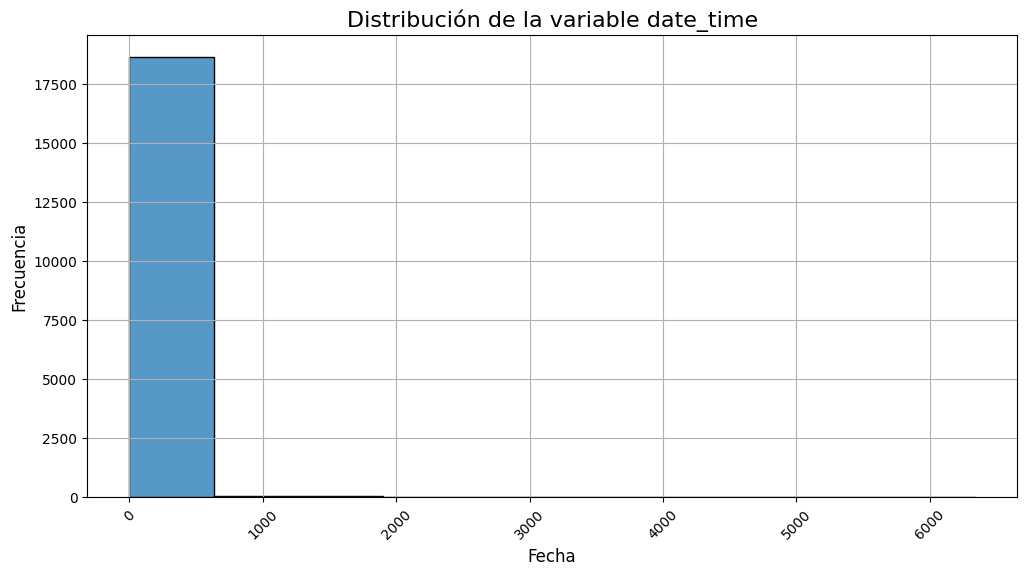

In [139]:

# Contar la frecuencia de registros por día
frecuencia = user_steps.groupby('date_time').size()
# Crear el gráfico de distribución
plt.figure(figsize=(12, 6))
sns.histplot(data=frecuencia, kde=False, bins=10)  # Puedes ajustar bins según tus datos
plt.title('Distribución de la variable date_time', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()